## Исследование данных о российском кинопрокате



**План исследования:**
1. Изучить файлы с данными. Определить знак разделитель.
2. Загрузить библеотеки (pandas и matplotlib)
3. Изучить таблицы (.info(), .head())
4. Объединить две таблицы с данными mkrf_movies и mkrf_show.
   - Выбрать столбец для объединения.
   - Сверить тип данных в таблицах. Если типы разные, то поменять в одной из таблиц методом .astype()
   - Изучить получившуюся таблицу, используя .info() и .head()
5. Предобработка данных.
   - Проверить типы данных, преобразовать.
   - Изучить и заполнить пропуски в данных.
     - Начинаем с .isna().sum(), чтобы узнать, где есть пропуски.
     - Объяснить, почему заполнял именно так.
   - Изучить дубликаты в таблице
   - Изучить категориальные переменные на предмет неявных дубликатов
   - Проверить количественные переменные
   - Добавить новые столбцы
     - Год начала проката
     - Доля господдержки в бюджете
     - Имя главного режиссера
     - Основной жанр фильма
6. Исследовательский анализ данных
   - Сколько фильмов выходило в прокат каждый год
   - Динамика кассовых сборов по годам
   - Среднее и медиана сборов для каждого года
   - Изучить влияние возрастных ограничений на сборы фильмов
7. Исследовательский анализ фильмов с государственной поддержкой
   - Как изменялась поддержка кино из года в год
   - Как изменялось количество фильмов, которые получали поддержку
   - Окупаются ли фильмы с государственной поддержкой
   - Какой рейтинг у фильмов с государственной поддержкой
   - Есть ли связь между объемом поддержки и рейтингом фильма
   - Какие жанры окупаются
8. Общий вывод.

### Шаг 1. Загрузка данных. 

In [1]:
import missingno as msno
import pandas as pd   # импортируем библиотеки 
import matplotlib.pyplot as plt

try:
    data_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')    # переменная data_movies будет содержать весь массив данных
except:
    data_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv', sep=',')

try:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')    # переменная data_shows будет содержать весь массив данных 2
except:
    data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/shows.csv', sep=',')


In [2]:
pd.options.display.max_columns = None # команда для того, чтобы видеть все колонки таблицы
pd.options.mode.chained_assignment = None

In [3]:
data_movies.info() # информация о mkrf_movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
data_movies.head() # посмотрим первые 5 строк таблицы

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
data_shows.info() # информация о mkrf_shows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
data_shows.head() # посмотреть 5 строк таблицы

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


**Вывод:**

**_В таблице mkrf_movies 15 столбцов и 7486 строк, в таблице mkrf_shows 2 столбца и 3158 строк._
_Общий столбец puNumber. Для объединения таблиц по этому столбцу необходимо привести их к одному типу данных - int._**

_Изначальная попытка изменить тип данных в data_movies['puNumber'] с object на int показала, что в столбце есть значения 'нет', которые мешают преобразованию._

_Поэтому сначала необходимо заменить это значение. Можно заменить 'нет' на 0. Тогда 0 будет означать отсутствие прокатного удостоверения._

In [7]:
data_movies['puNumber'] = data_movies['puNumber'].replace({'нет':'0'}) # замена нет на 0

_Теперь отсутсвию прокатного удостоверения соответсвует 0 в столбце puNumber._

In [8]:
data_movies['puNumber'] = data_movies['puNumber'].astype('int') # тип данных из object в int64

In [9]:
data_movies.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [10]:
data = data_movies.merge(data_shows, on='puNumber', how='left') # объединение двух таблиц в одно data

In [11]:
data.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:**

**_Столбцы puNumber из таблиц mkrf_movies и mkrf_shows имели разный тип данных. puNumber в mkrf_movies имел тип данных object, видимо, из-за необходимости отметить фильмы, у которых нет прокатного удостоверения. Значение "нет" в столбцах было заменено на 0. Далее, для объединения таблиц был изменён тип данных в столбце puNumber из таблицы mkrf_movies с object на int._**

### Шаг 2. Предобработка данных

#### Шаг 2.1. Типы данных

- Проверяем типы данных в датафрейме и преобразуйте их там, где это необходимо.

_Еще раз изучим получившуюсь таблицу с данными._

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


* Изменяем тип данных в столбце show_start_date с object на datatime64. 

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%f%z') # изменяем формат данных

In [16]:
data.dtypes['show_start_date'] # проверяем поменялся ли тип данных

datetime64[ns, UTC]

In [17]:
data.head(3) # проверяем

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


* Изменяем тип данных в ratings с object на float64.

In [18]:
data['ratings'].unique() # уникальные значения

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

_В данных рейтинга есть значения в процентах, их необходимо скорректировать, чтобы можно было изменить формат._

In [19]:
data['ratings'] = data['ratings'].replace({'99%': '9.9', '28%': '2.8', '97%': '9.7', '83%': '8.3', '64%': '6.4', '91%': '9.1', '94%': '9.4', '62%': '6.2', '79%': '7.9', '90%': '9.0', '19%': '1.9', '88%': '8.8', '89%': '8.9', '98%': '9.8'})

In [20]:
data['ratings'].unique() # проверяем

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4', '3.1',
       '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3', '1.8',
       '1.2', '1.7', '9.8'], dtype=object)

In [21]:
data['ratings'] = data['ratings'].astype('float32') # изменяем формат данных

In [23]:
data.dtypes['ratings'] # проверяем поменялся ли тип данных

dtype('float32')

**_Выводы:_**

* **_В столбце show_start_date находятся данные с неудобным типом данных для работы с датой. Тип данных был изменен на datatime64._**
* **_В столбце ratings рейтинг фильмов был представлен как в дробном формате, так и в формате процентов. Данные были приведены к единообразию и тип данных был переведен в числовой float._** 

#### Шаг 2.2. Пропуски в датафрейме

In [24]:
data.isna().sum() # количество пропусков

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

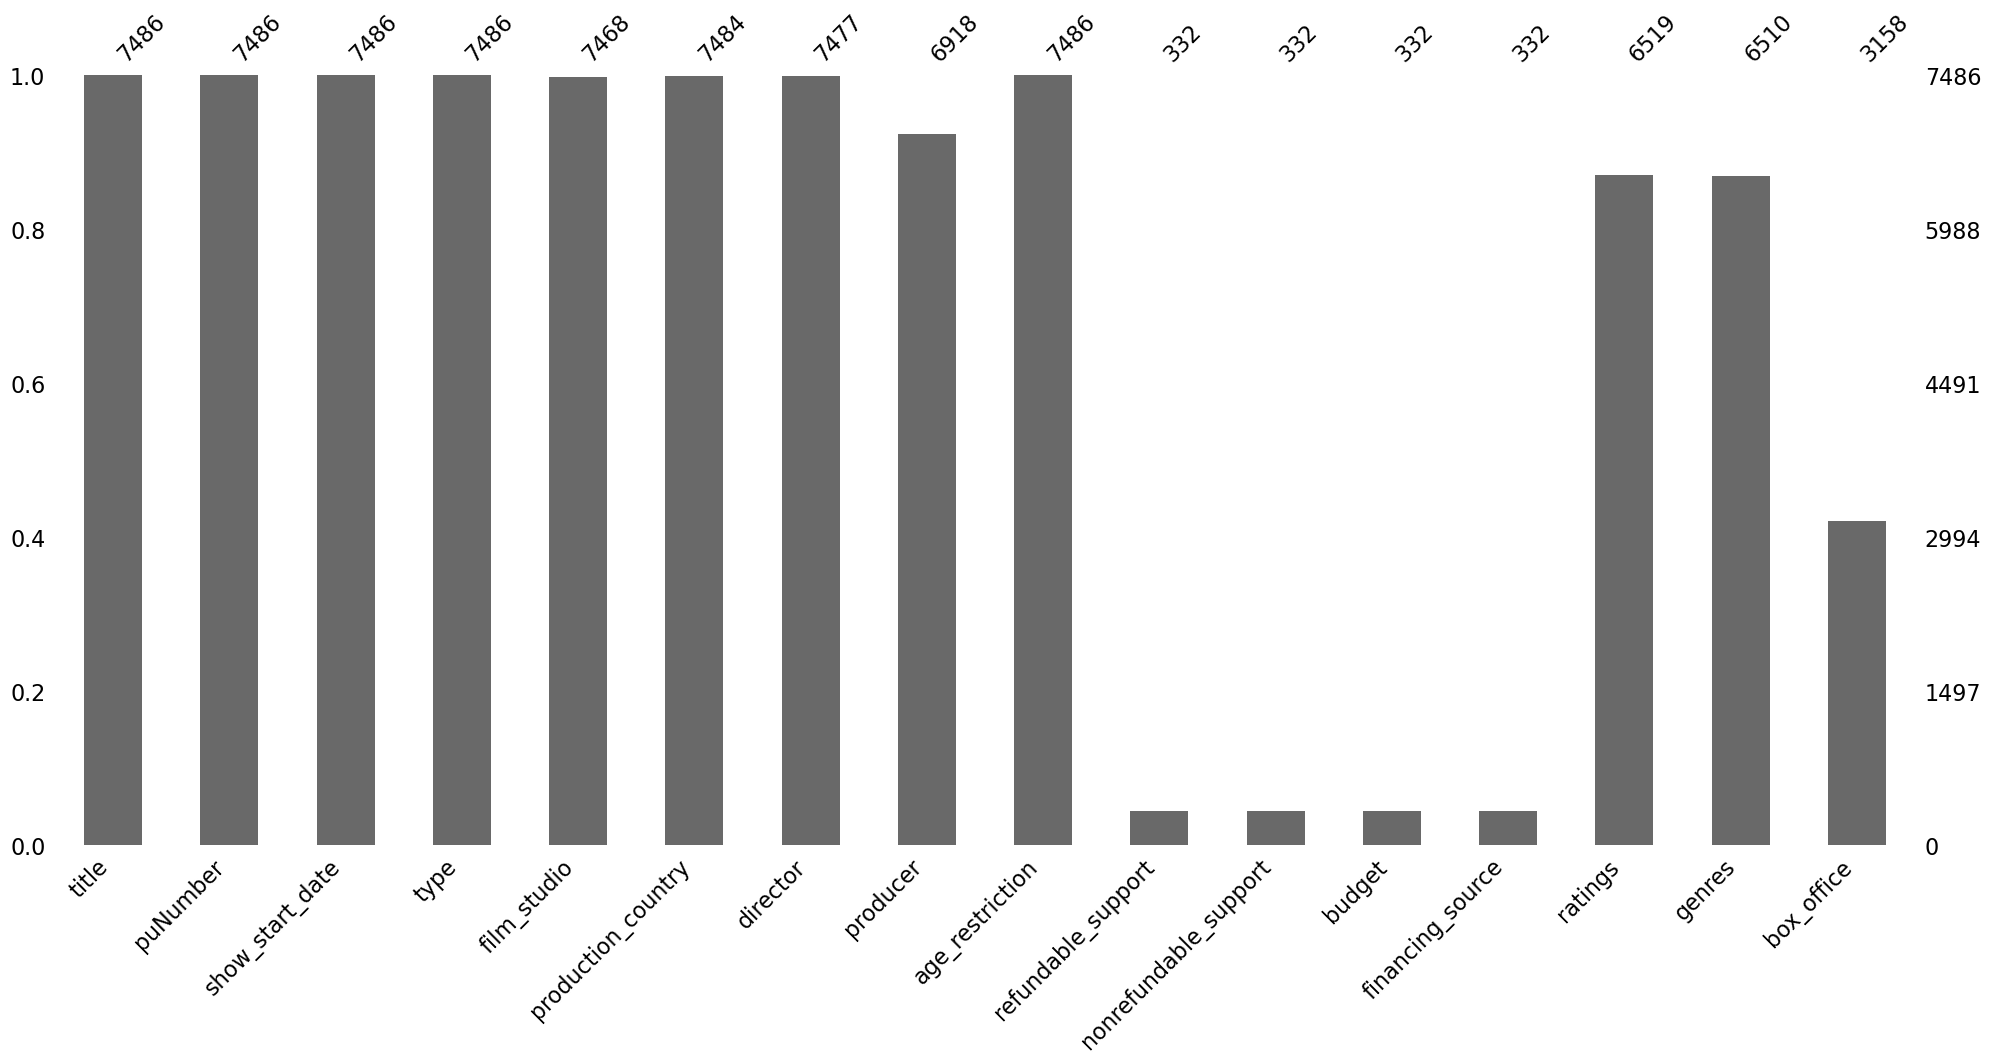

In [25]:
msno.bar(data);

_В столбцах refundable_support, nonrefundable_support, budget, financing_source одинаковое количество пропусков. Все эти столбцы связаны с государственной поддержкой. Вероятно пропуски значений соответствуют фильмам, у которых не было государственной поддержки._

_В качестве дополнительной проверки, что все вышеуказанные столбцы связаны, я удалил в одном из них пропуски, используя .dropna, при этом в остальных столбцах также пропали все пропуски._

_Изначально, я хотел заменить все пропуски на ноль. Но столбцы refundable_support и nonrefundable_support содержат нули, поэтому пока оставим пропуски._

* Заменяем пропуски в financing_source. Вместо пропусков сформируем еще одну категорию - 'нет'.

In [26]:
data['financing_source'] = data['financing_source'].fillna('нет') # замена

In [27]:
data['financing_source'].isna().sum() # проверка

0

In [28]:
data['financing_source'].unique() # уникальные значения

array(['нет', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

* Удалим пропущенные значения в production_country, director и film_studio. В данных столбцах очень мало пропущенных значений, этими строками можно пожертвовать без ущерба исследованию.

In [29]:
data = data.dropna(subset=['director']).reset_index(drop=True)

In [30]:
data = data.dropna(subset=['production_country']).reset_index(drop=True)

In [31]:
data = data.dropna(subset=['film_studio']).reset_index(drop=True)

In [32]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source            0
ratings                   948
genres                    957
box_office               4304
dtype: int64

_В остальных колонках оставим пустые значения. Удалять их нельзя, так как будет потеряно слишком много данных. Заполнить их не представляется возможным: столбец producer, genres и rating необходимо заполнять уникальными значениями. Столбец box_office содержит данные о сборах в рублях в российских кинотеатрах, возможно пропущенные значения соответсвуют фильмам, не выходившим в прокат в России. Пока оставим столбец box_office без изменения, вернемся к нему позже._  

**_Выводы:_**

**_В большом количестве столбцов таблицы были обнаружены пропуски в данных:_**

* **_В столбцах refundable_support, nonrefundable_support, budget, financing_source одинаковое количество пропусков. Все эти столбцы связаны с государственной поддержкой фильмов. Вероятно, пропуски значений соответствуют фильмам, у которых не было государственной поддержки._**
*  **_В столбце financing_source пропуски, вероятно, говорят нам об отсутствии государственной поддержки, поэтому заполним пропуски категорией «нет»._**
*  **_В столбцах production_country, director и film_studio есть очень небольшое количество пропущенных значений, их можно удалить._**
*  **_В остальных колонках (producer, genres и rating) удалять пропущенные значения опасно, так как можно потерять слишком большое количество данных. Оставляем их без изменения._**
*  **_При слиянии двух таблиц в столбце box_office появилось большое количество пропусков. Данные пропуски, вероятно, указывают на фильмы, которые не выходили в прокат в России._**

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

* Проверка дубликатов в столбце puNumber.

In [33]:
data['puNumber'].duplicated().sum() # количество дубликатов

2

In [34]:
data['puNumber'].value_counts() # частота встречаемости

puNumber
221054410    2
221154310    2
121010811    1
221049511    1
221049411    1
            ..
111004615    1
111004715    1
114000515    1
111004215    1
124010719    1
Name: count, Length: 7457, dtype: int64

_Два номера прокатного удостоверения повторяются по два раза. Изучим, что это за фильмы._

In [35]:
data.query('puNumber in [221054410, 221154310]') # срез по двум прокатным удостоверениям

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4629,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,7.0,"мелодрама,комедия",NaN
4630,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,7.6,"драма,мелодрама,история",NaN
5056,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,7.4,"комедия,криминал",NaN
5057,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет,6.8,"комедия,криминал",NaN


_Все строки с дубликатами прокатного удостоверения это разные фильмы. Сверим номера прокатных удостоверений с сайтом Министерства культуры._

_"Как жениться и отстаться холостым" номер 121002007_

_"Иоанна - женщина на папском престоле" номер 221154310. Номер совпадает с исходным._

_"Анализируй это!" подходит номер 221054410. Оставляем._

_"Анализируй то!" номер 221010006._

_Проверим, чтобы новые выбранные номера не встречались в таблице, чтобы не создать новые дубликаты._

In [36]:
data.query('puNumber in [121002007, 221010006]')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


_Таких номеров в таблице пока нет, можем их присвоить дубликатам._

In [37]:
data.loc[4629, 'puNumber'] = 121002007 # замена номера

In [38]:
data.loc[5057, 'puNumber'] = 221010006 # замена номера

In [39]:
data.query('puNumber in [121002007, 221010006]') # проверяем

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4629,Как жениться и остаться холостым,121002007,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,7.0,"мелодрама,комедия",NaN
5057,Анализируй то!,221010006,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет,6.8,"комедия,криминал",NaN


**_Вывод:_**

**_В столбце с номерами прокатного удостоверения были обнаружены повторы. После просмотра сайта Министерства культуры оказалось, что фильмы могли получать по несколько номеров удостоверений, видимо, если выходили в повторный прокат. Повторные номера были заменены другими выданными фильмам номерами, но такими, которые еще не встречались в таблице._**  

#### Шаг 2.4. Обработка категориальных значений

_Изучим категореальные значения на наличие неявных дубликатов._

* Изучим type на предмет неявных дупликатов.

In [40]:
data['type'].value_counts() # смотрим значения и их количество

type
Художественный                4514
 Художественный               1384
Анимационный                   828
Прочие                         401
Документальный                 280
Научно-популярный               50
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

_Два неявных дубликата: Художественный и Анимационный._

In [41]:
data['type'] = data['type'].str.strip() # убираем пробелы

In [42]:
data['type'].value_counts() # проверяем

type
Художественный                5898
Анимационный                   829
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
Name: count, dtype: int64

* Изучим название фильмов 'title'.

In [43]:
data['title'].value_counts()

title
День святого Валентина_                                                                                                      5
Робин Гуд (Robin Hood)                                                                                                       4
Безумцы                                                                                                                      4
Рапунцель: Запутанная история                                                                                                4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/                                                                  4
                                                                                                                            ..
Самые правдивые истории                                                                                                      1
Пионеры-герои.                                                                                           

_Некоторые фильмы повторяются по несколько раз. Изучим, с чем это может быть связано._

In [44]:
data.query('title in ["Безумцы", "День святого Валентина_", "Робин Гуд (Robin Hood)", "Рапунцель: Запутанная история", "Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/"]')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
332,Безумцы,221005115,2015-02-25 12:00:00+00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,NaN,NaN,NaN,нет,7.9,драма,NaN
338,Робин Гуд (Robin Hood),221027016,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Имэджин Интертейнмент, Риле...",Великобритания - США,Ридли Скотт,"Брайан Грейзер, Рассел Кроу, Ридли Скотт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,7.2,"боевик,драма,приключения",NaN
371,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121026516,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,8.1,"фэнтези,драма,детектив",745510.0
378,Рапунцель: Запутанная история,224013614,2014-10-10 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет,7.9,"мультфильм,мюзикл,фэнтези",NaN
379,Рапунцель: Запутанная история,224026712,2012-10-23 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет,7.9,"мультфильм,мюзикл,фэнтези",NaN
3897,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,6.7,"мелодрама,комедия",NaN
3986,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,6.7,"мелодрама,комедия",NaN
4064,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,6.7,"мелодрама,комедия",NaN
4190,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,6.7,"мелодрама,комедия",NaN
4192,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121021010,2010-11-11 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет,8.1,"фэнтези,драма,детектив",1700.0


_Фильмы одинаковые, но с разными номерами прокатных удостоверений, и с разной датой премьеры. Не будем ничего изменять в этом столбце, но запомним данный факт._ 

* Изучим столбец production_country.

In [45]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [46]:
data['production_country'].value_counts() # сколько каких значений

production_country
США                                                                    2171
Россия                                                                 1802
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          253
                                                                       ... 
Швеция - США                                                              1
Франция - Германия - Турция - Катар                                       1
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: count, Length: 950, dtype: int64

_В данном столбце много неявных дубликатов. Избавимся от них._

In [47]:
data['production_country'] = data['production_country'].str.strip() # убираем лишние пробелы

In [48]:
data['production_country'] = data['production_country'].str.replace(' - ', '-') # убираем пробелы перед тире

In [49]:
data['production_country'] = data['production_country'].str.replace(', ', '-') # вместо запятой ставим тире

In [50]:
data['production_country'].unique() # уникальные значения

array(['США', 'СССР', 'Франция', 'СССР-Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'Новая Зеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия-Казахстан-США', 'СССР-Швеция',
       'СССР-Франция-Англия-Куба-ГДР', 'Германия',
       'Великобритания-США-Германия-КНР', 'СССР-ЧССР-Западный Берлин-ПНР',
       'СССР-Италия', 'Гонконг-КНР', 'США-Франция',
       'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР-Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобритания-Франция-США', 'Новая Зеландия-

In [51]:
data['production_country'].value_counts() # сколько каких значений

production_country
США                                                                  2174
Россия                                                               1802
СССР                                                                  377
Франция                                                               302
Великобритания                                                        255
                                                                     ... 
Швеция-Куба                                                             1
Испания-Канада-Япония                                                   1
Италия-Аргентина-Словения                                               1
Испания-Франция-Нидерланды-Германия-Бельгия-Великобритания-Канада       1
Дания-Канада-Швеция-Франция-Германия-Великобритания-США                 1
Name: count, Length: 818, dtype: int64

_После обработки в данном столбце было исключено 132 неявных дубликата._

* Изучим данные в столбце age_restriction.

In [52]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

_В данном столбце неявных дубликатов нет. Но можно подкорректировать значения, так как они уж слишком длинные._

In [53]:
data['age_restriction'] = data['age_restriction'].replace({'«18+» - запрещено для детей': '18+', '«12+» - для детей старше 12 лет': '12+', '«16+» - для детей старше 16 лет': '16+', '«6+» - для детей старше 6 лет': '6+', '«0+» - для любой зрительской аудитории': '0+'})

In [54]:
data['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

* Изучим столбец genres.

In [55]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

_На первый взгляд в данном столбце все впорядке. В качестве разделителя жанров везде используется запятая, лишних пробелов нет._

* Столбец financing_source был обработан ранее. В него была добавлена категория 'нет', соответствующая остсутствию государственного финансирования.

* Данные в столбцах film_studio, director, producer оставим пока без изменений.

**_Выводы:_**

**_В категориальных переменных был обнаружен ряд ошибок. Лишние пробелы в строках, разные разделители в строках со списками. Ошибки были исправлены._**

#### Шаг 2.5. Обработка количественных значений


* В столбце ratings были убраны значения в процентах.

_Проверим распределение значений в refundable_support, nonrefundable_support, budget._ 

Столбцы refundable_support, nonrefundable_support, budget связаны. Пропуски в данных столбцах совпадают и показывают нам, что государственного финансирования не было. Изначально, я хотел заменить все пропуски на ноль. Но в столбцах refundable_support и nonrefundable_support содержат нули, поэтому пока оставим пропуски._

* Распределение значений в refundable_support.

_Изучим распределение значений в refundable_support (объём возвратных средств государственной поддержки). Для этого посмотрим основные параметры выборки, построим ящик с усами и гистограмму распределения значений._

In [56]:
data['refundable_support'].describe().apply(lambda x:format(x, 'f')) # основные характеристики выборки

count          332.000000
mean      11864457.831325
std       24916555.263644
min              0.000000
25%              0.000000
50%              0.000000
75%       15000000.000000
max      180000000.000000
Name: refundable_support, dtype: object

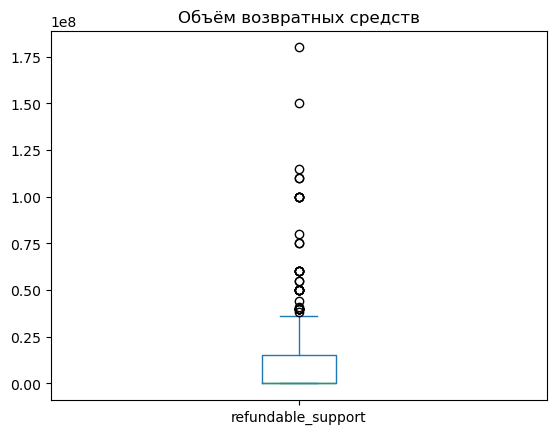

In [57]:
data['refundable_support'].plot.box(title='Объём возвратных средств'); # построение ящика с усами. Используем pandas для игнорирования пропусков.

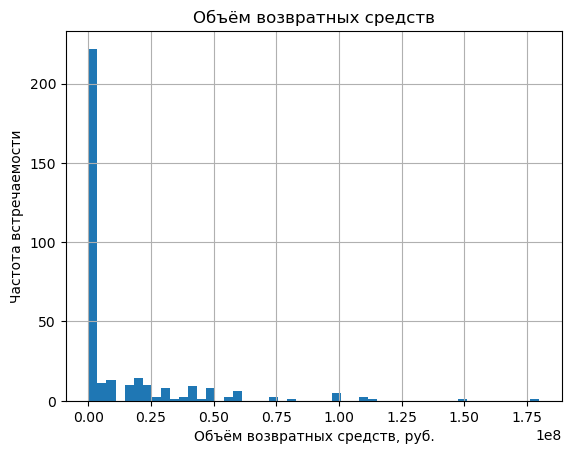

In [58]:
data['refundable_support'].hist(bins=50) # построение гистограммы распределения значений
plt.title('Объём возвратных средств')
plt.xlabel('Объём возвратных средств, руб.')
plt.ylabel('Частота встречаемости');

_Медиана объема возвратных средств государственной поддержки составляет 0, это нам говорит о том, что в выборке половины фильмов поддрежка выдавалась на безвозвратной основе. Максимальный объем возвратных средств составил 180 миллионов._ 

* Распределение значений в nonrefundable_support.

_Изучим распеределение в nonrefundable_support (объём невозвратных средств государственной поддержки). Для этого посмотрим основные параметры выборки, построим ящик с усами и гистограмму распределения значений._

In [59]:
data['nonrefundable_support'].describe().apply(lambda x:format(x, 'f'))

count          332.000000
mean      48980988.891566
std       59980117.923301
min              0.000000
25%       25000000.000000
50%       30000000.000000
75%       40375000.000000
max      400000000.000000
Name: nonrefundable_support, dtype: object

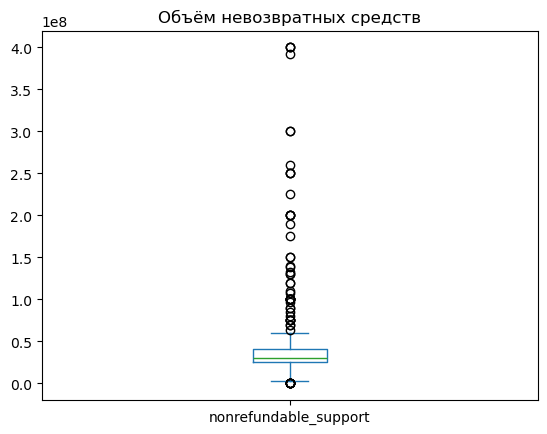

In [60]:
data['nonrefundable_support'].plot.box(title='Объём невозвратных средств'); # построение ящика с усами. Используем pandas для игнорирования пропусков.

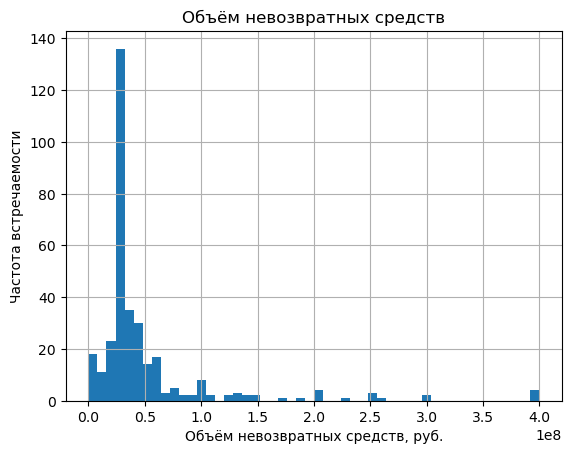

In [61]:
data['nonrefundable_support'].hist(bins=50) # построение гистограммы распределения значений
plt.title('Объём невозвратных средств')
plt.xlabel('Объём невозвратных средств, руб.')
plt.ylabel('Частота встречаемости');

_Медиана объема невозвратных средств государственной поддержки состваляет 30 миллионов. Максимальное значение составляет 400 миллионов. Есть некоторое количество нулевых значений. Возможно, есть фильмы, за которые должна была быть возвращена вся сумма кредита._ 

* Распределение значений в budget

_Изучим разспеределение в budget (общий бюджет фильма). Для этого посмотрим основные параметры выборки, построим ящик с усами и гистограмму распределения значений._

In [62]:
data['budget'].describe().apply(lambda x:format(x, 'f')) # основные характеристики выборки

count           332.000000
mean      127229716.683735
std       188588333.115158
min               0.000000
25%        42000000.000000
50%        68649916.000000
75%       141985319.500000
max      2305074303.000000
Name: budget, dtype: object

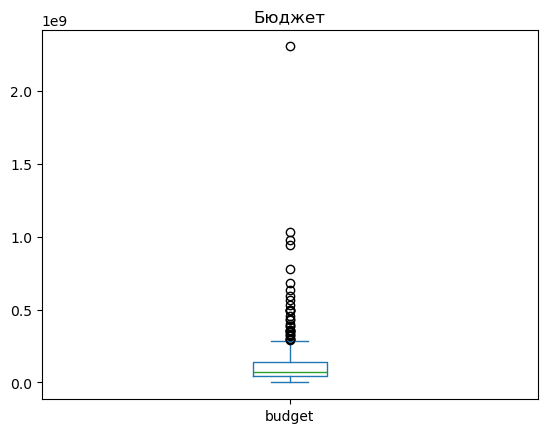

In [63]:
data['budget'].plot.box(title='Бюджет'); # построение ящика с усами. Используем pandas для игнорирования пропусков.

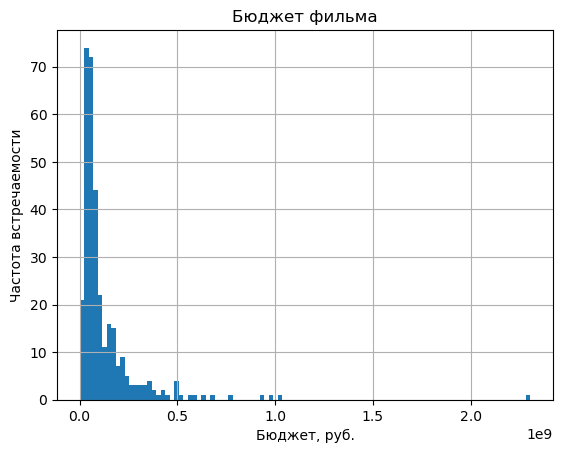

In [64]:
data['budget'].hist(bins=100) # построение гистограммы распределения значений
plt.title('Бюджет фильма')
plt.xlabel('Бюджет, руб.')
plt.ylabel('Частота встречаемости');

_Медиана общего бюджета фильма составляет 70 миллионов. Большая часть фильмов в выборке имеют бюджет от 42 до 142 миллионов рублей. Вызвает вопросы минимальное и максимальное значение. Минималый бюджет составил 0, что сомнительно, максимальный бюджет составил 2 миллиарда._

* Распределение в box_office.

_Изучим разспеределение в box_office (сборы в рублях). Для этого посмотрим основные параметры выборки, построим ящик с усами и гистограмму распределения значений._

In [65]:
data['box_office'].describe().apply(lambda x:format(x, 'f'))

count          3155.000000
mean       76551328.803528
std       240455853.441566
min               0.000000
25%           87090.500000
50%         2338049.900000
75%        23995460.840000
max      3073568690.790000
Name: box_office, dtype: object

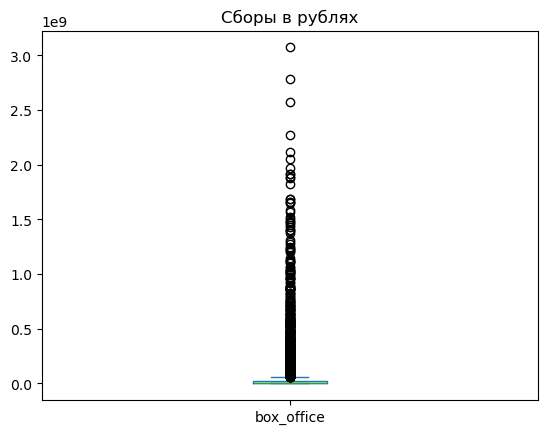

In [66]:
data['box_office'].plot.box(title='Сборы в рублях'); # построение ящика с усами. Используем pandas для игнорирования пропусков.

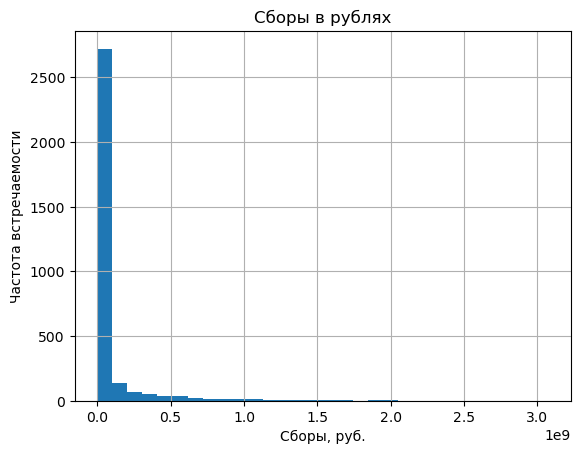

In [67]:
data['box_office'].hist(bins=30) # построение гистограммы распределения значений
plt.title('Сборы в рублях')
plt.xlabel('Сборы, руб.')
plt.ylabel('Частота встречаемости');

_Медиана сбора в рублях составляет 2.3 миллиона рублей. Большая часть фильмов в выборке собрали от 87 тысяч до 24 миллионов рублей. Минимальное значение 0 рублей, такое значение вызывает вопросы. Максимальное значение составляет 3 миллиарда, интересно, что это за фильм такой._

**_Выводы:_**

* **_Во всех количественных значениях были обнаружены единичные очень большие значения._**
* **_В столбце refundable_support половина данных имеет значение 0, что, возможно, может свидетельствовать о том, что в выборке половины фильмов с господдержкой деньги выдавались на безвозвратной основе._**
* **_В столбце budget были обнаружены фильмы с нулевым бюджетом. Такие фильмы были удалены в дальнейшем при расчете доли государственной поддержки в общем бюджете фильма._**
* **_В столбце сборы в рублях были также обнаружены нулевые значения. Такое значение вызывает вопросы, возможно, эти фильмы не выходили в прокат._**

#### Шаг 2.6. Выделение новых признаков

- Создадим столбец с информацией о годе проката. Возьмём год из даты премьеры фильма.

_Извлекаем из столбца show_start_date в отдельный столбец год выхода фильма в прокат. Для этого создадим переменную show_start_year._

In [68]:
data['show_start_year'] = data['show_start_date'].dt.year # округление до года

In [69]:
data.head() # проверим

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,нет,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,NaN,NaN,NaN,нет,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [70]:
data['pr_director'] = data['director'].str.split(",").str[0]

In [71]:
data['pr_genres'] = data['genres'].str.split(",").str[0]

In [72]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,pr_director,pr_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,нет,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,NaN,NaN,NaN,нет,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

_В начале надо удалить нулевые значения из столбца общий бюджет фильма._

In [73]:
#good_budget = data.copy()

In [74]:
good_budget = data.query('budget > 0') # делаем срез исключая данные, где бюджет составляет 0

_Для подсчета доли государственной поддержки в общем бюджете разделим сумму возвратных и невозвратных средств государственной поддержки на общий бюджет фильма. И создадим новый столбец budget_per_support._

In [75]:
good_budget['budget_per_support'] = (good_budget['refundable_support'] + good_budget['nonrefundable_support'])/good_budget['budget'] 

_Изучим основные параметры выборки в новом столбце._

In [76]:
good_budget['budget_per_support'].describe()

count    315.000000
mean       0.517386
std        0.170043
min        0.044043
25%        0.373458
50%        0.592265
75%        0.656931
max        0.784745
Name: budget_per_support, dtype: float64

_Медиана составляет 60 %. В основном поддержка фильмов из нашей выборки составляет 37 - 66 %. Минимальная поддержка составила 4 %, а маскимальная 78 %._

**Вывод:**

**_Для дальнейшего исследования были созданы дополнительные столбцы с данными. Год начала проката – show_start_year, основной режиссер фильма – first_director, основной жанр фильма – first_genres и доля государственной поддержки в бюджете фильма._**

### Шаг 3. Исследовательский анализ данных


_Как маркер данных о прокате будем использовать столбец boc_office. В данном столбце представлены сборы в рублях в российских кинотеатрах. Соответсовтенно, можно предположить, что пустые значение указывают на фильмы, которые не выходили в прокат в российских кинотеатрах._

* Изучим сколько фильмов выходило в прокат каждый год. Рассчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Для этого разделим количество фильмов в прокате на общее количество фильмов в этом году, определенное количеству названий. 

In [77]:
title_stat = data.groupby('show_start_year')[['title', 'box_office']].count()

In [78]:
title_stat['part'] = title_stat['box_office']/title_stat['title']

In [79]:
title_stat

,title,box_office,part
show_start_year,,,
2010,980,105,0.107143
2011,620,109,0.175806
2012,592,127,0.214527
2013,629,184,0.292528
2014,806,279,0.346154
2015,705,465,0.659574
2016,817,525,0.642595
2017,505,357,0.706931
2018,879,474,0.539249


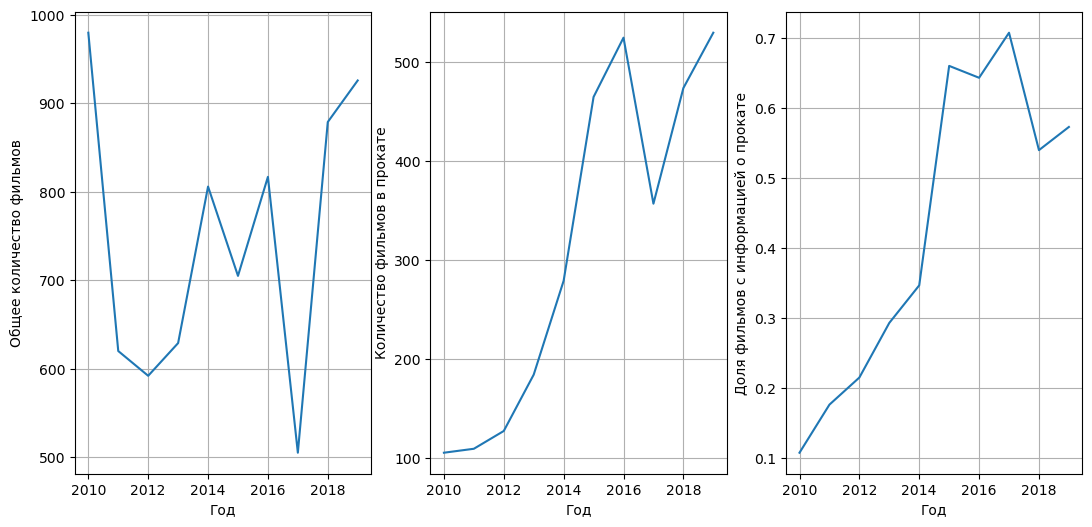

In [80]:
f, ax = plt.subplots(1, 3, figsize=(13,6))  # задаем количество полей для графиков и размеры
ax[0].plot(title_stat['title'])  # cтроим график
ax[0].set_xlabel('Год')            # Название оси x
ax[0].set_ylabel('Общее количество фильмов')       # название оси y
ax[0].grid()
ax[1].plot(title_stat['box_office'])       
ax[1].set_xlabel('Год')             
ax[1].set_ylabel('Количество фильмов в прокате') 
ax[1].grid()
ax[2].plot(title_stat['part'])       
ax[2].set_xlabel('Год')             
ax[2].set_ylabel('Доля фильмов с информацией о прокате') 
ax[2].grid()
pass

**_Количество фильмов, вышедших в прокат в российских кинотеатрах, резко вырасло в период с 2010 по 2016 год. В 2017 году наблюдается резкий провал, но также резкий провал наблюдается в общем числе фильмов. С 2018 по 2019 год снова наблюдается увеличение числа фильмов в российских кинотеатрах. Доля фильмов, вышедших в прокат в российских кинотеатрах от общего числа фильмов, значительно выросла с 2010 года по 2017 год, в 2018 - 2019 произошло падение._**

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [81]:
data.groupby('show_start_year')[['box_office']].sum()

,box_office
show_start_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.911073e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786611e+10
2017,4.856371e+10
2018,4.966836e+10


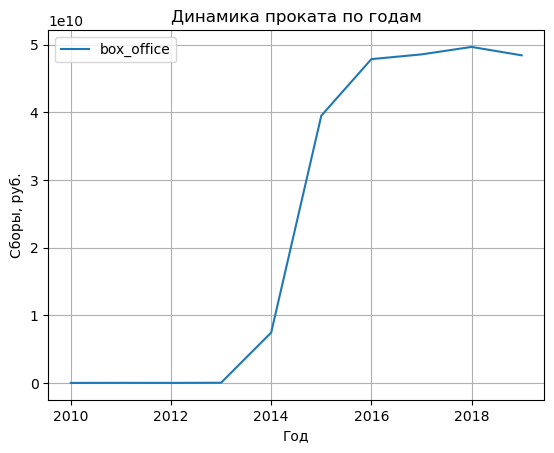

In [82]:
(
data.groupby('show_start_year')[['box_office']].sum()
    .plot(grid=True, ylabel='Сборы, руб.', xlabel='Год', title='Динамика проката по годам')
);

**_Сумма сборов значительно выросла с 2014 года. Минимальные сборы были получены в 2010 году, максимальные сборы были получены в 2018 году. Возможно, такой рост связан с увеличением количества фильмов в прокате, кроме того, может быть связан с выходом наиболее кассовых фильмов в период с 2014 года._**

In [83]:
(
data.query('box_office > 1.0e+9') # сделаем срез по фильмам, которые принесли больше 1.0 миллиарда
    .pivot_table(index='show_start_year', values='box_office', aggfunc=['sum', 'count'])
)

,sum,count
,box_office,box_office
show_start_year,,
2014,1.016411e+09,1
2015,1.057067e+10,8
2016,1.584969e+10,11
2017,1.573190e+10,10
2018,1.646611e+10,11
2019,2.225117e+10,14


**_Действительно, фильмы, которые собрали больше 1 миллиарда рублей, вышли после 2014 года. Таким образом подняв общие сборы за эти годы._**

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [84]:
box_office_general = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['median', 'mean'])

In [85]:
box_office_general

,median,mean
,box_office,box_office
show_start_year,,
2010,1700.000,2.313004e+04
2011,3000.000,1.293832e+05
2012,5560.000,5.441790e+04
2013,3522.500,1.619549e+05
2014,18160.000,2.668442e+07
2015,4920933.000,8.494057e+07
2016,3915041.020,9.117353e+07
2017,9968340.000,1.360328e+08


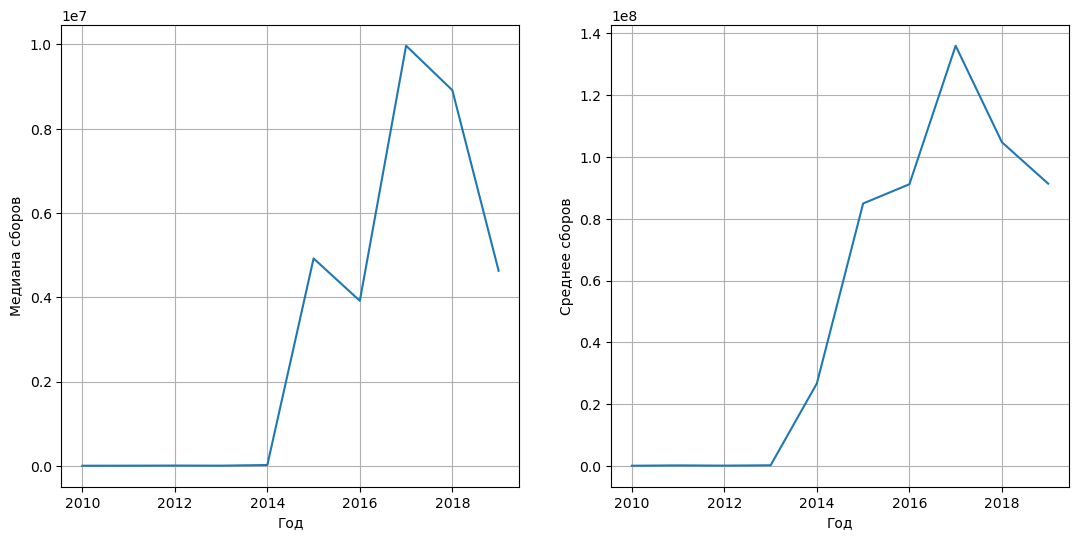

In [86]:
f, ax = plt.subplots(1, 2, figsize=(13,6))  # задаем количество полей для графиков и размеры
ax[0].plot(box_office_general['median'])  # cтроим график
ax[0].set_xlabel('Год')            # Название оси x
ax[0].set_ylabel('Медиана сборов')       # название оси y
ax[0].grid()
ax[1].plot(box_office_general['mean'])       
ax[1].set_xlabel('Год')             
ax[1].set_ylabel('Среднее сборов') 
ax[1].grid()
pass

**_Медиана и среднее очень различаются: в выборке много фильмов с нулевыми сборами, которые сдвигают медиану в сторону малых значений и мало фильмов с очень значительными сборами, которые сдвигают среднее в сторону больших значений. Увеличение медианы и среднего наблюдается с 2010 по 2017 год. С 2017 году происходит падение как медианы, так и среднего значения. Вероятно, это связано с ростом числа фильмов в прокате с 2017 года, при этом общие сборы за год с 2017 года изменились незначительно._**

_Попробуем сделать такую же сводную таблицу, но ограничив выборку от  80 тыс до 30 миллионов, сюда попадают значения между 25 и 75 %._

In [87]:
box_office_exp = (
data.query('80000 < box_office < 3.0e+7')
    .pivot_table(index='show_start_year', values='box_office', aggfunc=['median', 'mean'])
)

In [88]:
box_office_exp

,median,mean
,box_office,box_office
show_start_year,,
2010,245630.000,6.201470e+05
2011,263820.000,2.198160e+06
2012,308916.000,4.751198e+05
2013,162670.000,1.579796e+06
2014,554251.000,2.729999e+06
2015,2357132.050,5.882233e+06
2016,1981937.000,5.215956e+06
2017,3684947.000,6.799610e+06


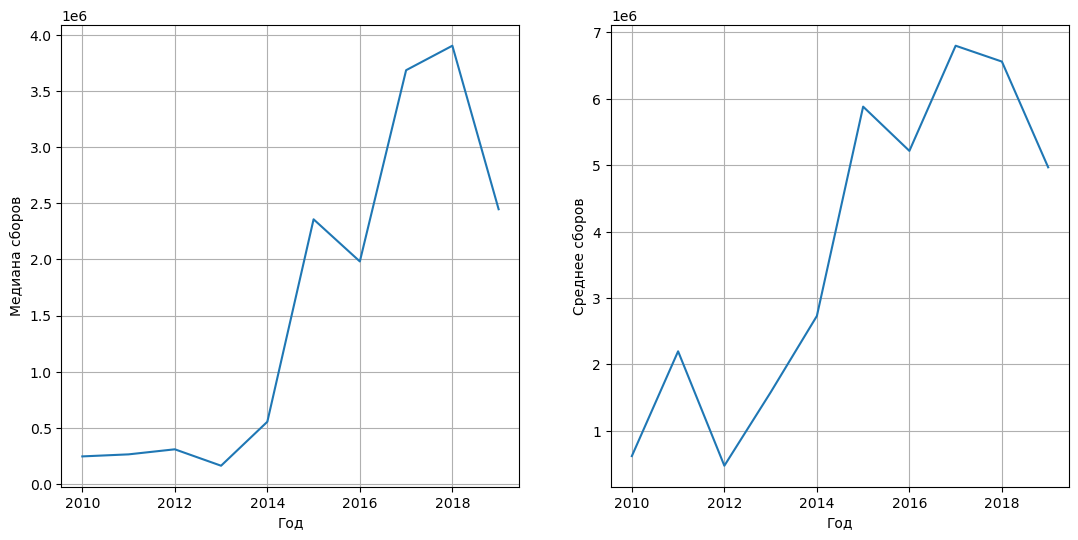

In [89]:
f, ax = plt.subplots(1, 2, figsize=(13,6))  # задаем количество полей для графиков и размеры
ax[0].plot(box_office_exp['median'])  # cтроим график
ax[0].set_xlabel('Год')            # Название оси x
ax[0].set_ylabel('Медиана сборов')       # название оси y
ax[0].grid()
ax[1].plot(box_office_exp['mean'])       
ax[1].set_xlabel('Год')             
ax[1].set_ylabel('Среднее сборов') 
ax[1].grid()
pass

**_В целом картина осталась прежней. Но значения медианы и среднего стали ближе._**

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

_Для этого, сначала сделаем срез данных, чтобы в него вошли фильмы после 2015 года. После этого построим барплот, где будут показаны суммы сборов фильмов по годам в зависимости от возрастного ограничения._

In [90]:
box_office_per_age_restr = data.query('show_start_year > 2014')

In [91]:
box_age_year = pd.pivot_table(
    data=box_office_per_age_restr,
    index='show_start_year',
    columns='age_restriction',
    values='box_office',
    aggfunc='sum')

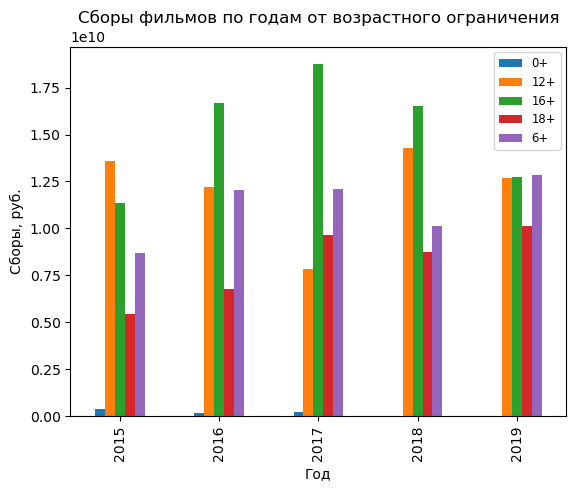

In [92]:
box_age_year.plot.bar()
plt.title('Сборы фильмов по годам от возрастного ограничения')
plt.xlabel('Год')
plt.ylabel('Сборы, руб.')
plt.legend(fontsize='small');

**_Больше всего денег собирают фильмы из группы 16+. Меньше всего денег собирают фильмы из группы 0+ независимо от года. Отношение доходов в группах (12+, 16+, 18+ и 6+) меняется в зависомости от года. Доход от фильмов 18+ постепенно ростет. Доход от фильмов 6+ достаточно стабилен. В 2017 году можно отметить рост доходов от фильмов 16+. Увеличение доходов в той или иной категории может быть связано с выходом в этот год кассовых фильмов._**  

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

* Изучим, как изменялась общая денежная сумма государственной поддержки на кино по годам.

In [93]:
data['general_support'] = data['refundable_support'] + data['nonrefundable_support'] # общая государсвтвенная поддержка

In [94]:
data['general_support'].describe().apply(lambda x:format(x, 'f')) # распределение значений

count          332.000000
mean      60845446.722892
std       72755459.467024
min        3000000.000000
25%       25333750.000000
50%       35000000.000000
75%       60000000.000000
max      500000000.000000
Name: general_support, dtype: object

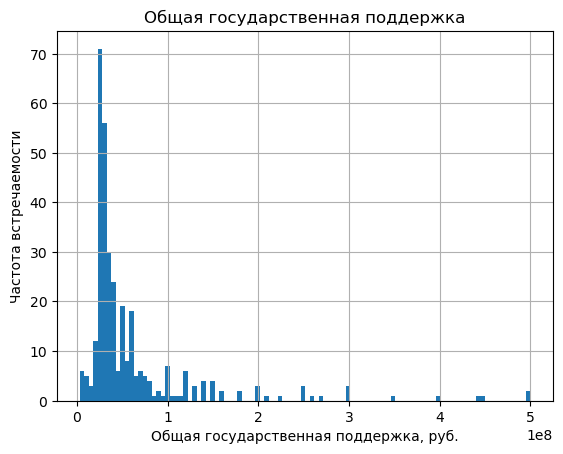

In [95]:
data['general_support'].hist(bins=100) # гистограмма
plt.title('Общая государственная поддержка')
plt.xlabel('Общая государственная поддержка, руб.')
plt.ylabel('Частота встречаемости');

_Медианное значение выделяемых средств состаляет 35 миллионов. Большая часть фильмов получали финансирование от 25 до 60 миллионов. Минимальная поддержка составила 3 миллиона, а максимальная целых 500 миллионов_

In [96]:
data.sort_values(by='general_support',ascending=False).head(3) # три фильма с наибольшей господдержкой

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,pr_director,pr_genres,general_support
7447,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12+,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,500000000.0
7437,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12+,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,500000000.0
3347,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",16+,150000000.0,300000000.0,684200536.0,Фонд кино,6.6,драма,3.642851e+08,2016,А.Мизгирев,драма,450000000.0


_Тройка фильмов получивших наибольшую государственную поддержку выглядит так: Вторжение, Союз спасения, Дуэлянт._

In [97]:
good_budget.sort_values(by='box_office',ascending=False).head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,pr_director,pr_genres,budget_per_support
7429,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,0.375000
5642,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09,2017,А.Мегердичев,спорт,0.677745
6526,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12+,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,2018,А.Сидоров,драма,0.319271


_А самыми кассовымы фильмами оказались: Холоп, Движение вверх и Т-34_

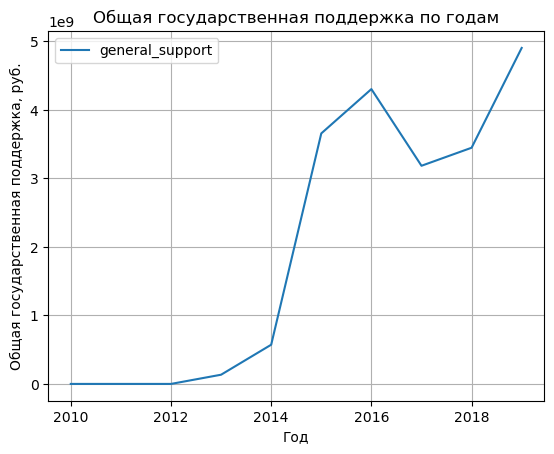

In [98]:
(
data.groupby('show_start_year')[['general_support']].sum() # распределение по годам
    .plot(grid=True, ylabel='Общая государственная поддержка, руб.', xlabel='Год',title='Общая государственная поддержка по годам')
);

In [99]:
data.query('show_start_year < 2014 and general_support >= 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,pr_director,pr_genres,general_support
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,26500000.0
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,107847945.0


**_Количество денег, выделяемое государством на кино, резко увеличилось с 2014 года. В 2017 есть небольшой провал. С 2018 года финансирование снова увеличилось. Данные за 2010 - 2012 год либо не представлены, либо финансирования не было._** 

* Изучим как изменилось количество поддержанных фильмов. Возможно количество денег, выделяемых на кино, стало больше, но "фильтр" стал строже.

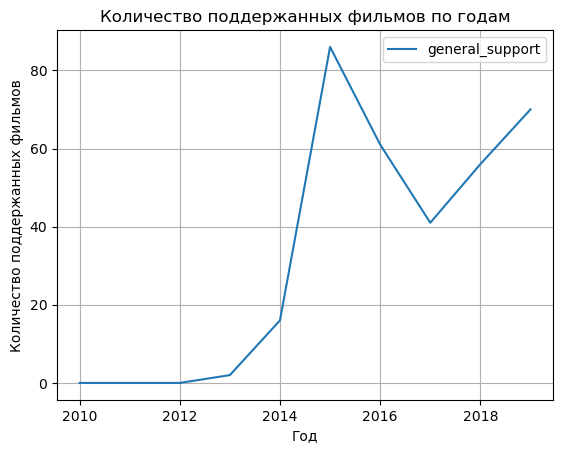

In [100]:
(
data.groupby('show_start_year')[['general_support']].count() # распределение по годам
    .plot(grid=True, ylabel='Количество поддержанных фильмов', xlabel='Год', title='Количество поддержанных фильмов по годам')
);

**_Количество фильмов с государственной поддержкой также увеличилось с 2014 года. Но после 2015 года произошло резкое падение таких фильмов, больше чем в два раза. Хотя финансирование упало не столь заметно. После 2017 года количество фильмов с государственной поддержкой стало расти.Данные за 2010 - 2012 год либо не представлены, либо финансирования не было._** 

* Изучим окупаемость фильмов.

_На просторах интернета мне попался такой вариант формулы окупаемости фильма: (сборы фильма - (2 * бюджет)). Далее буду исходить из этой формулы._

In [101]:
good_budget['payback'] = good_budget['box_office'] - (2 * good_budget['budget']) # good_budget переменная без нулевых бюджетов

In [102]:
good_budget['payback'].describe().apply(lambda x:format(x, 'f'))

count            301.000000
mean      -138977278.227409
std        402298305.448188
min      -4276551546.410000
25%       -194034090.020000
50%       -100869672.000000
75%        -71458927.000000
max       2753568690.790000
Name: payback, dtype: object

In [103]:
good_budget.loc[good_budget.loc[:,'payback'] > 0]['title'].count()

32

**_Если следовать такому подходу, то получается, что большая часть фильмов, получившая государственную поддержку не окупилась в прокате. Окупилось только 32 фильма._**

* Изучим распределение рейтингов фильмов получивших государственную поддержку.

In [104]:
only_support = data.dropna(subset='budget') # пересенная,где только господдержка

In [105]:
only_support['ratings'].describe() # распределение рейтинга

count    316.000000
mean       6.020886
std        1.148944
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

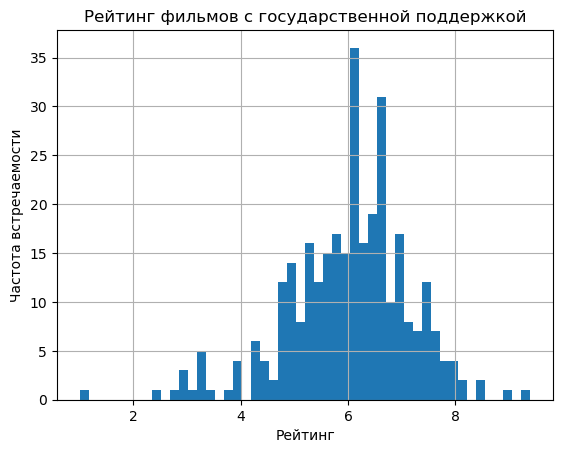

In [106]:
only_support['ratings'].hist(bins=50)
plt.title('Рейтинг фильмов с государственной поддержкой')
plt.xlabel('Рейтинг')
plt.ylabel('Частота встречаемости');

**_Полученное распределение рейтинга фильмов с государственной поддержкой стремится к нормальному распределению. Средний рейтинг составляет 6.2. Минимальный рейтинг составляет 1, а максимальный 9.4._**

* Изучим есть ли связь между величиной государственной поддержки и рейтингом, который получил фильм.

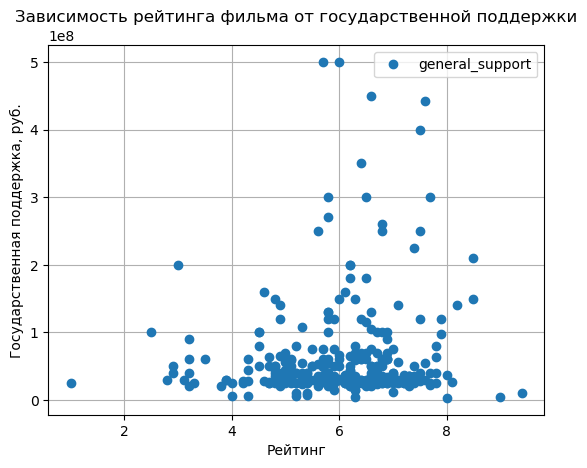

In [107]:
data.plot(x='ratings', y='general_support', xlabel='Рейтинг', ylabel='Государственная поддержка, руб.', title='Зависимость рейтинга фильма от государственной поддержки', grid=True, style='o'); # график зависимости рейтинга от общей господдержки

_Сделаем срезы, исключив редкие значения: рейтинг ограничим от 2 до 8, а господдержку ограничим 200 миллионами. Снова построим график и рассчитаем корреляцию._

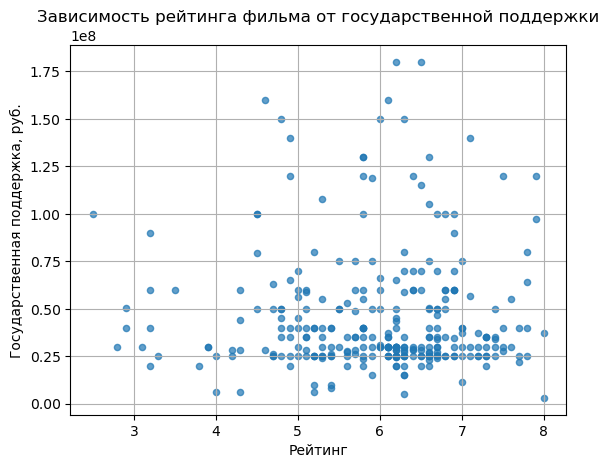

In [108]:
cor_ratings = data.query('2 < ratings <= 8 and general_support < 2e+8') # делаем срезы для total_area и last_price
cor_ratings.plot(x='ratings', y='general_support',kind='scatter',xlabel='Рейтинг', ylabel='Государственная поддержка, руб.', title='Зависимость рейтинга фильма от государственной поддержки', grid=True, alpha=0.7); # строим скаттерплот

In [109]:
cor_ratings['ratings'].corr(cor_ratings['general_support']) 

-0.011711954959910146

**_Коэффициент корреляции составил -0.01, это говорит о том, что связи между количеством государственной поддержки и рейтингом фильмов нет. А могло бы быть так просто, чем больше денег вложил, тем лучше кино получилось._**

* Изучим фильмы с государственной поддежркой по жанрам, какой жанр лучше всего окупается. Возможно мы сможем дать совет, на фильмы каких жанров Министерству культуры надо выделять деньги, а на что лучше не надо.

In [110]:
( 
good_budget.groupby('pr_genres')['payback'].agg(['sum']) # группировка данных и подсчет количества значений
    .sort_values(by='sum',ascending=True) # сортировка данных
)

,sum
pr_genres,
драма,-1.246502e+10
мультфильм,-5.488656e+09
приключения,-5.428135e+09
фэнтези,-3.684411e+09
история,-2.834656e+09
детектив,-2.257897e+09
триллер,-2.106668e+09
фантастика,-1.818319e+09
мелодрама,-1.669456e+09


In [113]:
general_pr_director = data.groupby('pr_director')['general_support'].agg(['sum', 'count'])

In [115]:
general_pr_director.sort_values(by='sum',ascending=False)

,sum,count
pr_director,,
Н.Хомерики,660000000.0,3
А.Кравчук,500000000.0,1
Ф.Бондарчук,500000000.0,1
Р.Давлетьяров,459847945.0,5
А.Мизгирев,450000000.0,1
...,...,...
Дмитрий Черняков,0.0,0
Доме Карукоски,0.0,0
Доминик Абель,0.0,0


In [119]:
(
data.query('pr_director in ["Н.Хомерики"]')
    .sort_values(by='general_support', ascending=False)
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,pr_director,pr_genres,general_support
3449,Ледокол,111016316,2016-10-11 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,Н.Хомерики,"И.Толстунов, С.Козлов",12+,100000000.0,200000000.0,430000000.0,Фонд кино,6.5,драма,3.370697e+08,2016,Н.Хомерики,драма,300000000.0
6860,Девятая,111007019,2019-09-19 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Н.Хомерики,"С.Мелькумов, А.Роднянский",16+,0.0,300000000.0,453704666.0,Фонд кино,5.8,"детектив,триллер,криминал",5.587689e+07,2019,Н.Хомерики,детектив,300000000.0
5662,Селфи,111012117,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,20000000.0,40000000.0,0.0,Фонд кино,5.8,"триллер,драма",2.251964e+08,2018,Н.Хомерики,триллер,60000000.0
4334,Черчилль.,211001210,2010-01-19 12:00:00+00:00,Художественный,"ООО ""ЧБк фильм""",Россия,"Н.Хомерики, О.Бычкова, С.Мокрицкий, С.Егерев, ...",И.Малкин,16+,NaN,NaN,NaN,нет,7.1,"драма,биография,история",NaN,2010,Н.Хомерики,драма,NaN
4423,Ночь длиною в жизнь,111009910,2010-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Отражение""",Россия,Н.Хомерики,"М.Бабаханов, Е.Борисова, Н.Горшкова",16+,NaN,NaN,NaN,нет,6.9,"драма,военный",NaN,2010,Н.Хомерики,драма,NaN
5289,Сердца бумеранг,111009811,2011-12-16 12:00:00+00:00,Художественный,РО Фонд поддержки кинематографии для детей и ю...,Россия,Н.Хомерики,"С.Кучмаева, А.Рагозина",18+,NaN,NaN,NaN,нет,6.1,драма,NaN,2011,Н.Хомерики,драма,NaN


**_Лучше всего окупаются фильмы на тему спорта и комедии, а вот с приключениями, мультфильмами и драмами совсем плохо._** 

### Шаг 5. Общий вывод

**В данной работе были проанализированы данные Министерства культуры Российской Федерации – рынок российского кинопроката за 2010 – 2019 год.
Задачей было проанализировать общий список фильмов, которые имеют прокатное удостоверении, а также, отдельно, проанализировать фильмы, получившие государственную поддержку**

**Данные представляли собой две таблицы, одна из которых содержала общую информацию о фильмах, вторая содержала данные о прокате фильмов в российских кинотеатрах.**

**На этапе предобработки данных были сделаны следующие шаги:**
- Таблицы были объединены по номеру прокатного удостоверения.
- Были изменены типы данных в столбце с датой начала проката, в столбце с номером прокатного удостоверения, в столбце с рейтингом фильма.
- В большом количестве столбцов таблицы были обнаружены пропуски данных.
- Столбцы с объемами государственной поддержки, источником финансирования и бюджетом связаны и соответствуют фильмам, которые получили государственную поддержку.
- В категориальных переменных был обнаружен ряд ошибок, связанный с появлением лишних пробелов и разными разделителями при перечислении в строка с данными.
- При предобработке данных выяснилось, что фильмы могли получать по несколько номеров удостоверений, видимо, если выходили в повторный прокат.

**Далее изучили гистограммы распределения значений для количественных переменных. Во многих столбцах были обнаружены аномальные и слишком большие значения. Обработку таких значений проводили по ходу дальнейшего исследования.** 

**В столбце budget были обнаружены фильмы с нулевым бюджетом. Такие фильмы не использовались в дальнейшем при расчете параметров, связанных с бюджетом фильма.**

**Для дальнейшего исследования в таблицу были добавлены новые столбцы: год начала проката фильма, основной режиссер фильма, основной жанр фильма и доля государственной поддержки в бюджете фильма.**

**Из предобработки можно сделать вывод, что данные заполняются недостаточно аккуратно. Нет единообразия в заполнении категориальных данных; данные, которые должны иметь числовой формат, оказываются в формате object, из-за добавления в них нескольких строковых значений.**

**При анализе данных были выявлены следующие закономерности:**
- Общее число фильмов, получающих прокатное удостоверение, резко сократилось после 2010 года, но почти вернулось к исходным значениям в 2019 году.
- Количество фильмов, выходящих в прокат в России, увеличивается.
- Доля фильмов, выходящих в прокат от общего числа фильмов, тоже увеличивается.
- Отдельно надо отметить 2017 год, в который резко упало общее количество фильмов, но из-за этого большая их часть попала в прокат, и доля в прокате увеличилась.
- Сумма сборов в российских кинотеатрах резко выросла, начиная с 2014 года. Что логично, так как увеличилось количество фильмов в прокате. Кроме того, рост может быть связан с выходом наиболее кассовых фильмов после 2014 года.
- Сборы фильмов зависят от возрастного ограничения. Больше всего собирают фильмы 16+, так как, вероятно, они охватывают наибольшую аудиторию зрителей. Меньше всего приносят фильмы 0+, они в большей степени ориентированы на детскую аудиторию и вряд ли взрослые без детей на них пойдут.

**Отдельно были рассмотрены фильмы, получившие государственную поддержку:**
- Количество денег, выделяемых на поддержку российского кино, увеличилось после 2014 года.
- Количество фильмов, которые получили поддержку, увеличилось после 2014 года.
- За 2010 – 2012 год нет данных о финансировании российского кино.
- Большая часть фильмов, получивших государственную поддержку, не смогли окупиться в прокате.
- Окупилось только 32 фильма из 301.
- Средний рейтинг российских фильмов с господдержкой по версии Кинопоиска составил 6.
- Связи между количеством вложенных денег государством в фильм и его рейтингом обнаружить не удалось.
- Лучше всего окупаются спортивные фильмы и комедии. Драмы самый не окупаемый жанр.
- Тройка фильмов, получивших наибольшую государственную поддержку, выглядит так: Вторжение, Союз спасения, Дуэлянт. А самыми кассовыми фильмами оказались: Холоп, Движение вверх и Т-34.

 
